In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ziya07/slope-stability-analysis-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\boris\.cache\kagglehub\datasets\ziya07\slope-stability-analysis-dataset\versions\1


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
dataset = pd.read_csv ('C:\\Users\\boris\\.cache\\kagglehub\\datasets\\ziya07\\slope-stability-analysis-dataset\\versions\\1\\slope_stability_dataset.csv')
dataset.head()

,Unit Weight (kN/m³),Cohesion (kPa),Internal Friction Angle (°),Slope Angle (°),Slope Height (m),Pore Water Pressure Ratio,Reinforcement Type,Reinforcement Numeric,Factor of Safety (FS)
0,18.745401,21.813837,38.249958,41.907228,18.451042,0.847237,Drainage,3,2.613692
1,24.507143,19.981044,24.612800,32.964623,9.266800,0.494517,Geosynthetics,2,2.241626
2,22.319939,12.926926,28.665992,58.224926,10.686165,0.195466,Retaining Wall,0,1.568244
3,20.986585,32.327000,36.582016,20.948923,13.130201,0.736642,Drainage,3,3.000000
4,16.560186,26.448087,32.052234,39.392821,14.164400,0.418678,Soil Nailing,1,3.000000


In [9]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
print ("Матрица признаков"); print(X[:5])
print ("Зависимая переменная"); print(y[:5])

Матрица признаков
[[21.81383683]
 [19.98104433]
 [12.92692606]
 [32.32700015]
 [26.44808722]]
Зависимая переменная
[38.24995777 24.61279989 28.66599236 36.58201592 32.05223361]


In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)


LinearRegression()

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 10)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

[32.68004024] [32.69614269]


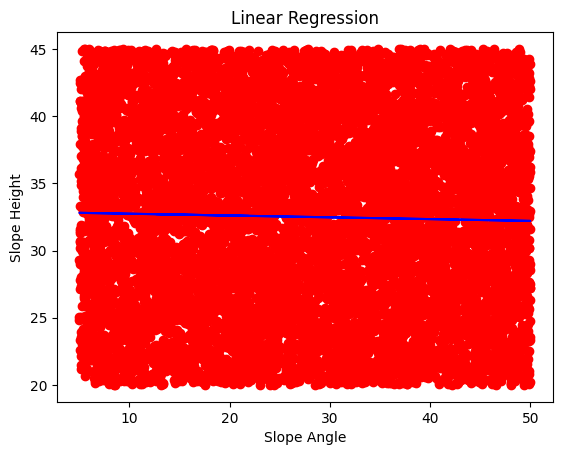

In [12]:
y_pred_lin = lin_reg.predict([[14.3]])
y_pred_poly = lin_reg_2.predict(poly_reg.fit_transform([[1.3]]))
print(y_pred_lin, y_pred_poly)
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Slope Angle')
plt.ylabel('Slope Height')
plt.show()

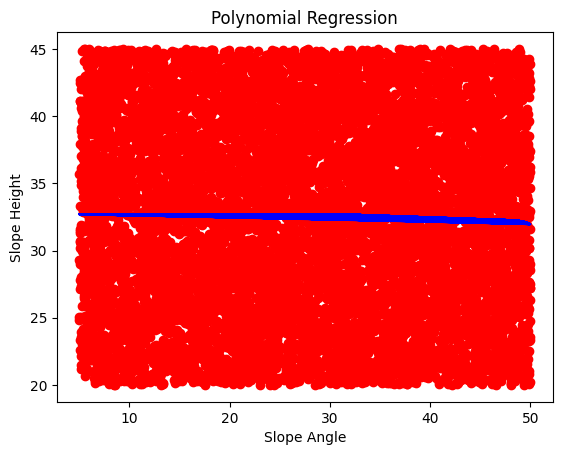

In [13]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Slope Angle')
plt.ylabel('Slope Height')
plt.show()

C:\Users\boris\AppData\Local\Temp\ipykernel_18472\1583142844.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


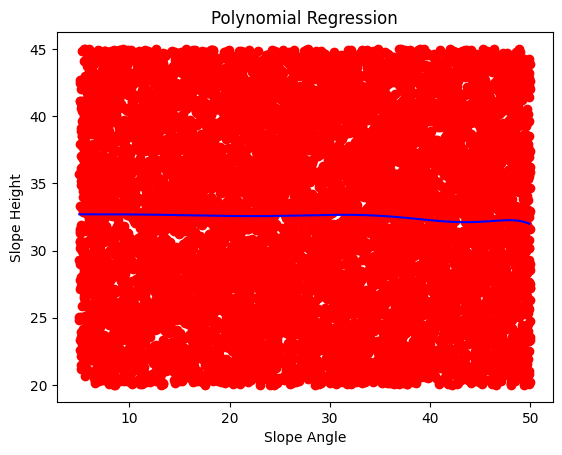

In [14]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Slope Angle')
plt.ylabel('Slope Height')
plt.show()